# Houlberg profile reproducer 2

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sympy

In [2]:
.T_data = pd.read_csv("/home/dominik/houlberg-profiles.csv").drop("Zeff", axis=1)
zeff = pd.read_csv("/home/dominik/houlberg-profiles-zeff.csv")

fig, (ax, ax2) = plt.subplots(2)
T_data.plot(x="x", ax=ax)
zeff.plot(x="x", ax=ax2, c="g")

SyntaxError: invalid syntax (<ipython-input-2-6c81b72b7edd>, line 1)

In [ ]:
import sympy
sympy.init_printing()
rho = sympy.symbols("rho")
n_i = sympy.Function('n_i')(rho)
n_e = sympy.Function('n_e')(rho)
n_C = sympy.symbols('n_C') # flat
Z_eff = sympy.Function("Z_{eff}")(rho);

Sprawdziłem definicję $Z_{eff}$ u Hirshmana:

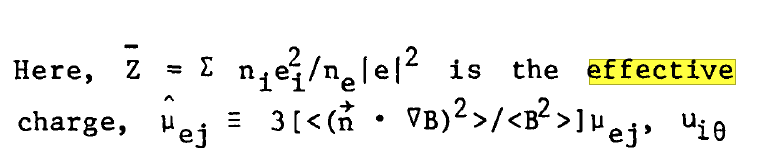

więc:

In [ ]:
Z_eff_from_elems = (n_i + 6**2 * n_C) / n_e
equation = sympy.Eq(Z_eff,
                    Z_eff_from_elems)

Więc bardzo proste przekształcenie daje:

In [ ]:
n_e_solution = sympy.solve(equation, n_e)[0]

In [ ]:
values_at_zero = {   # blisko środka, rho = 0
    Z_eff.subs(rho, 0): 1.36,
    n_i.subs(rho, 0): 6.5e19,
    n_C: 5e18,
}
values_at_zero[n_e] = ne0_value = n_e_solution.subs(rho, 0).subs(values_at_zero)

values_at_zero

In [ ]:
T0, Ta = sympy.symbols(r"T_0 t_a")
T_profile = T0 * ((1 - Ta) * (1 - rho**2) + Ta)

In [ ]:
T_outputs = T_profile, T_profile.diff(rho)

In [ ]:
ne0, nea, = sympy.symbols(r"n_{e0} n_{ea}")
n_e_profile = ne0 * ((1 - nea) * sympy.sqrt(1 - rho**2) + nea)

In [ ]:
n_e_outputs = n_e_profile, n_e_profile.diff(rho)

In [ ]:
n_i_profile = sympy.solve(equation, n_i)[0].subs(n_e, n_e_profile).simplify()

In [ ]:
n_i_outputs = n_i_profile, n_i_profile.diff(rho).simplify()

In [ ]:
n_i_profile.diff(rho).subs(values_at_zero)

In [ ]:
values_general = {
    ne0: ne0_value,
    nea: 0.22,
    Ta: 0.09,
    T0: 1, # keV
    n_C: 5e18,
}

In [ ]:
Zeff_vals = zeff.Zeff

In [ ]:
Zeff_grad = np.gradient(Zeff_vals, zeff.x)

In [ ]:
from scipy import interpolate

In [ ]:
spl = interpolate.(zeff.x, zeff.Zeff)

fig, (ax1, ax2) = plt.subplots(2)
zeff.plot(x="x", lw=5, ax=ax1)
ax1.plot(zeff.x, spl(zeff.x))
plt.plot(zeff.x, spl.derivative(1)(zeff.x))

In [ ]:
def funcify(expr, rho_vals, Zeff_spl, values):
    functions = expr.subs(values), expr.diff(rho).subs(values)
    args = (rho, Z_eff, Z_eff.diff(rho))
    return sympy.lambdify(args,
                   functions,
                   modules='numpy')(rho_vals, Zeff_spl(rho_vals), Zeff_spl.derivative(1)(rho_vals))
T_vals, dT_vals = funcify(T_profile, T_data.x.values, spl, values_general)

In [ ]:
T_data.plot(x="x", y="ToverT0")
plt.plot(T_data.x.values, T_vals)

In [ ]:
n_e_vals, dn_e_vals = funcify(n_e_profile, T_data.x.values, spl, values_general)
n_e_vals

In [ ]:
T_data.plot(x="x", y="neoverne0")
plt.plot(T_data.x.values, n_e_vals/values_general[ne0])

In [ ]:
n_i_vals, dn_i_vals = funcify(n_i_profile, T_data.x.values, spl, values_general)
n_i_vals